In [89]:
##Importing all neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
## Setting pandas to display all columns

pd.set_option('display.max_columns', None)

In [160]:
## Reading the csv file to pandas dataframe

df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [126]:
## Viewing the firs 5 entries of the dataframe

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,postive_balance,high_balance
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [5]:
## The dimension of the dataframe (10000 rows and 12 columns)

df.shape

(10000, 12)

In [6]:
## Checking if there are some null values in the dataframe

df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
## Checking if the there are some duplicated values in the dataframe

df.duplicated().sum()

0

In [8]:
## Statistical describing of the dataframe, including non numerical values

df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
## Showing the data types of the dataframe

df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [10]:
## Showing the correlation between values in dataframe

df.corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [161]:
## Feature engineering, creating new column "Positive balance", if the customer has positive balance in the bank, value is 1, otherwise 0

balance_threshold = 0
df['postive_balance'] = df['balance'].apply(lambda x: 1 if x > balance_threshold else 0)

In [162]:
## Feature engineering, creating new column "Multiple proucts", if the customer has more than one product, value is 1, otherwise 0

df['multiple_products'] = df['products_number'].apply(lambda x: 1 if x > 1 else 0)

In [163]:
## Dropping the columns I won't use in the trainning for X_train and X_val

train_data = df.drop(columns=['customer_id','churn', 'gender', 'country', 'balance'], axis = 1)

In [164]:
## Assigning train_data as X and churn as y

X = train_data
y = df['churn']

In [165]:
## Splitting the X and y into trainning and validation set with 80:20 ratio

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [166]:
## Scaling and transforming the X_train and X_val using Standard Scaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [167]:
## Using SMOTE because the dataset is highly imbalanced, nearly 80% of the values are non-churn and only about 20% are churn values

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [168]:
## Designing the model for prediction, using XGB Classifier with Grid Search Cross-validation

param_grid = {
    'n_estimators': [50],                # Number of trees to build
    'learning_rate': [0.01, 0.1],             # Step size shrinkage
    'min_child_weight': [5],                 # Minimum sum of instance weight needed in a child
    'gamma': [0],                        # Minimum loss reduction required to make a further partition
    'subsample': [0.6],                  # Subsample ratio of the training instances
    'reg_lambda': [1, 1.5, 2]                     # L2 regularization term on weights
                  
}
xgb_model = xgb.XGBClassifier(use_label_encoder=False,eval_metric = 'logloss')
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv = 4, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0], 'learning_rate': [0.01, 0.1],
                         'min_child_weight': [5], 'n_estimators': [50],
                         'reg_lambda': [1, 1.5, 2], 'subsample': [0.6]})

In [169]:
## The best parameters of the model

print('Best params: ' , xgb_grid.best_params_)

Best params:  {'gamma': 0, 'learning_rate': 0.1, 'min_child_weight': 5, 'n_estimators': 50, 'reg_lambda': 1, 'subsample': 0.6}


In [170]:
##S electing the best model and trainning the model again

best_xgb = xgb_grid.best_estimator_
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [171]:
## Experimenting with different threshold for predicting positive class for better recall

probs = best_xgb.predict_proba(X_val)[:, 1]  


threshold = 0.5
predictions = (probs >= threshold).astype(int)

print('Threshold:', threshold)
print('Accuracy:', accuracy_score(y_val, predictions))
print('Precision:', precision_score(y_val, predictions))
print('Recall:', recall_score(y_val, predictions))
print('F1 Score:', f1_score(y_val, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_val, predictions))

Threshold: 0.5
Accuracy: 0.8265
Precision: 0.5424528301886793
Recall: 0.6005221932114883
F1 Score: 0.57001239157373
Confusion Matrix:
[[1423  194]
 [ 153  230]]


In [172]:
## Classificatin report with precision, recall and F1-score

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1617
           1       0.54      0.60      0.57       383

    accuracy                           0.83      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.83      0.83      2000



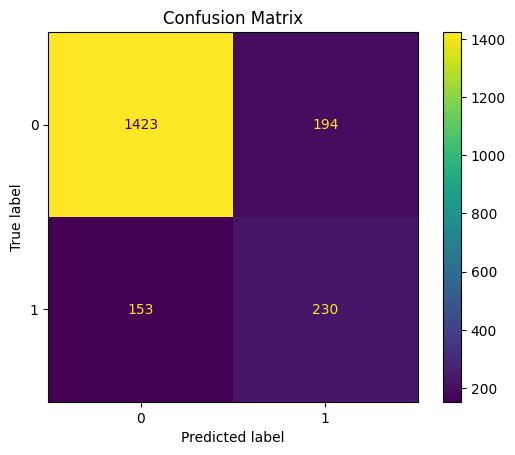

In [173]:
## Confusion Matrix of the predicted and the real values

ConfusionMatrixDisplay.from_predictions(y_val, predictions)
plt.title('Confusion Matrix')
plt.show()

In [13]:
## Saving the model as .pkl

with open ("best_xgb.pkl", "wb") as file:
    pickle.dump(best_xgb, file)

In [14]:
## Making the preprocessor for new data

numerical_features = ["credit_score", "age", "tenure", "balance", "products_number", "credit_card", "active_member", "estimated_salary", "postive_balance", "multiple_products" ]


preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features)
    
])





best_xgb = pickle.load(open("best_xgb.pkl", "rb"))



pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", best_xgb)
])

pipeline.fit(train_data, y_train_pipeline)


with open("churn_pipeline.pkl", "wb") as file:
    pickle.dump(pipeline, file)

In [29]:
## Oppening the model and predicting new data

with open("churn_pipeline.pkl", "rb")as file:
    pipeline = pickle.load(file)

new_data = pd.DataFrame({
    "credit_score": [650],
    "age": [40],
    "tenure": [1],
    "balance": [50000],
    "products_number": [1],
    "credit_card": [0],
    "active_member": [0],
    "estimated_salary": [80000]

})


prediction = pipeline.predict_proba(new_data)
print("Churn chance of leaving is: ", prediction[0, 0] *100)

Churn chance of leaving is:  70.11706829071045
